# K-Nearest Neighbor Lab
Read over the sklearn info on [nearest neighbor learners](https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification)




In [1]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
import numpy as np
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 1 K-Nearest Neighbor (KNN) algorithm

### 1.1 (15%) Basic KNN Classification

Learn the [Glass data set](https://archive.ics.uci.edu/dataset/42/glass+identification) using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier) with default parameters.
- Randomly split your data into train/test.  Anytime we don't tell you specifics (such as what percentage is train vs test) choose your own reasonable values
- Give typical train and test set accuracies after running with different random splits
- Print the output probabilities for a test set (predict_proba)
- Try it with different p values (Minkowskian exponent) and discuss any differences

In [2]:
# Learn the glass data
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

def get_glass_xy ():
  ds = arff.loadarff('glass.arff')
  df = pd.DataFrame(ds[0])

  le = LabelEncoder()
  df['Type'] = le.fit_transform(df['Type'])

  X = df.drop('Type', axis=1)
  y = df['Type']

  return X, y

def glass_knn_classifier(X, y, p=2):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

  clf = KNeighborsClassifier(p=p)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  y_pred_test = clf.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  return clf, X_test, accuracy_train, accuracy_test

In [3]:
X, y = get_glass_xy()

print("Typical train+test set accuracies:")
it = 20
avg_acc_train = 0
avg_acc_test = 0
for i in range(it):
  clf, X_test, acc_train, acc_test = glass_knn_classifier(X, y)
  avg_acc_train += acc_train
  avg_acc_test += acc_test
avg_acc_train /= it
avg_acc_test /= it
print(avg_acc_train, avg_acc_test)
print()

print("Output probabilities for a test set:")
clf, X_test, acc_train, acc_test = glass_knn_classifier(X, y)
print(clf.predict_proba(X_test))
print()

print("Accuracies for different p values:")
for i in range(1,6):
  clf, X_test, acc_train, acc_test = glass_knn_classifier(X, y, i)
  print(i, acc_train, acc_test)

Typical train+test set accuracies:
0.7649122807017544 0.647674418604651

Output probabilities for a test set:
[[0.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.6 0.4 0.  0.  0.  0. ]
 [0.6 0.  0.  0.  0.  0.4]
 [0.  0.6 0.4 0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.4 0.  0.  0.  0.  0.6]
 [0.  0.2 0.  0.  0.8 0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0.  0.2]
 [0.4 0.  0.  0.  0.  0.6]
 [0.  0.  0.  1.  0.  0. ]
 [0.8 0.2 0.  0.  0.  0. ]
 [0.  0.8 0.2 0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.8 0.  0.  0.  0.  0.2]
 [0.  0.  0.2 0.  0.8 0. ]
 [0.2 0.4 0.  0.  0.  0.4]
 [0.  0.6 0.4 0.  0.  0. ]
 [0.  0.4 0.4 0.  0.2 0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.4 0.  0.  0.  0.  0.6]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0. ]
 [0.  0.6 0.4 0.  0.  0. ]
 [0.2 0.8 0.  0.  0.  0. ]
 [0.4 0.6 0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0. ]

Discussion

In this task I started using the KNNClassifier. I initialized the glass dataset, initialized the KNNClassifier, and trained the KNNClassifier on the glass dataset. I did this because I wanted to learn how to use the KNNClassifier. The accuracies are lower than in previous labs. This may be because of the glass dataset, or it might be an inherent weakness of the KNNClassifier. Note that the output probabilities for the test set are based on fifths. I was surprised to observe that using lower-than-default p values gives better accuracies than the default p value. I am not sure why this is, but my hypothesis is that using the manhattan distance is better than using the other distances.

## 2 KNN Classification with normalization and distance weighting

Use the [magic telescope](https://axon.cs.byu.edu/data/uci_class/MagicTelescope.arff) dataset

### 2.1 (5%) - Without Normalization or Distance Weighting
- Do random 80/20 train/test splits each time
- Run with k=3 and *without* distance weighting and *without* normalization
- Show train and test set accuracy

In [4]:
from sklearn.preprocessing import MinMaxScaler

def get_telescope_xy ():
  ds = arff.loadarff('MagicTelescope.arff')
  df = pd.DataFrame(ds[0])

  le = LabelEncoder()
  df['class:'] = le.fit_transform(df['class:'])

  X = df.drop('class:', axis=1)
  y = df['class:']

  return X, y

def telescope_knn_classifier(X, y, n_n, w, normalization, shfl):
  if normalization:
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    X = scaler.transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=shfl)

  clf = KNeighborsClassifier(n_neighbors=n_n, weights=w)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  y_pred_test = clf.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  return accuracy_train, accuracy_test

In [5]:
# Learn magic telescope data

X, y = get_telescope_xy()

print(telescope_knn_classifier(X, y, 3, "uniform", False, True))

(0.8876182965299685, 0.7983701366982124)


*Discussion*

In this task I used the KNNClassifier with k=3. I initialized the telescope dataset, initialized the KNNClassifier function, and ran it on the dataset with k=3. I did this because I wanted to see how it performed with k=3. The accuracy is a lot higher than k=5. This is because the model can fit the data more closely. Note that this improvement applies to both the training and testing sets.

### 2.2 (10%) With Normalization
- Try it with k=3 without distance weighting but *with* normalization of input features.  You may use any reasonable normalization approach (e.g. standard min-max normalization between 0-1, z-transform, etc.)

In [6]:
# Train/Predict with normalization

X, y = get_telescope_xy()

print(telescope_knn_classifier(X, y, 3, "uniform", True, True))

(0.9018796004206099, 0.8301787592008412)


*Discuss the results of using normalized data vs. unnormalized data*

In this task I used the KNNClassifier with normalized data. I changed the KNNClassifier function to use normalization and ran it on the dataset with normalization enabled. I did this because I wanted to see how it compared with the non-normalized version. The accuracy is a bit higher than without normalization. This is because normalization stops the larger values from dominating the model. Note that this improvement improves the testing set more than the training set. I was surprised to observe that the accuracies didn't improve significantly. I am not sure why the improvement is smaller, but my hypothesis is that this dataset doesn't have big enough numbers to make normalization make a significant difference.

### 2.3 (10%) With Distance Weighting
- Try it with k=3 and with distance weighting *and* normalization

In [7]:
#Train/Precdict with normalization and distance weighting

X, y = get_telescope_xy()

print(telescope_knn_classifier(X, y, 3, "distance", True, True))

(1.0, 0.8427970557308097)


Comparison and Discussion

In this task I used the KNNClassifier with distance weighting. I changed the KNNClassifier function to use distance weighting and ran it on the dataset with distance weighting enabled. I did this because I wanted to see how it compared with the uniform-weighted version. The accuracy is a lot higher than with uniform weighting. This is because distance weighting leverages the spatial relationship between data points. I was surprised to observe that the accuracies only improved for the training set. I am not sure why there is no test set improvement, but my hypothesis is that distance weighting on this dataset makes the model overfit the data, at least with k=3 and normalization.

### 2.4 (10%) Different k Values
- Using your normalized data with distance weighting, create one graph with classification accuracy on the test set on the y-axis and k values on the x-axis.
- Use values of k from 1 to 15.  Use the same train/test split for each.

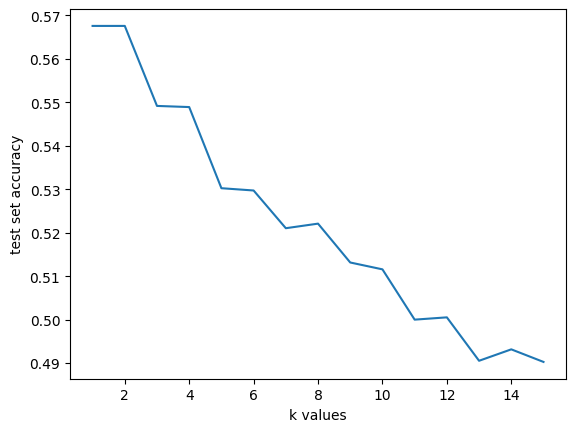

In [8]:
# Calculate and Graph classification accuracy vs k values

k_vals = []
test_accs = []

for i in range(1, 16):
  k_vals.append(i)
  tr_a, te_a = telescope_knn_classifier(X, y, i, "distance", True, False)
  test_accs.append(te_a)

plt.plot(k_vals, test_accs)
plt.xlabel("k values")
plt.ylabel("test set accuracy")
plt.show()

*Discussion*

In this task I trained the KNNClassifier with different k values. I created a loop to test the KNNClassifier on k values 1-15, ran the KNNClassifier with each k value, and graphed the accuracy with respect to k value. I did this because I wanted to see which k values performed the best. As you can see, larger k values lead to lower accuracy. This is because sorting into larger groups results in underfitting. Note that a k value of 2 seems to perform the best. I was surprised to observe that the highest accuracy was around 60%. I am not sure why it's so low this time, but my hypothesis is that the overfitting brought about by distance weighting, combined with the lack of shuffling when splitting the data, results in a significant drop in test accuracy.

## 3 KNN Regression with normalization and distance weighting

Use the [sklean KNeighborsRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html#sklearn.neighbors.KNeighborsRegressor) on the [housing price prediction](https://axon.cs.byu.edu/data/uci_regression/housing.arff) problem.  
### 3.1 (5%) Ethical Data
Note this data set has an example of an inappropriate input feature which we discussed.  State which feature is inappropriate and discuss why.

*Discuss the innapropriate feature*

The inappropriate feature in the dataset is "B" (1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town). This feature is inappropriate for several reasons. It explicitly uses the proportion of a specific racial group (Blacks) in the dataset. This can lead to biased models that perpetuate discrimination or unfairness based on race. Utilizing data based on someone's race raises significant privacy concerns. It can lead to profiling and discrimination against individuals based on their race, which is a violation of their fundamental rights. The target variable in this dataset is "MEDV" (Median value of owner-occupied homes). While it's tempting to consider factors influencing housing prices, using racial demographics is unlikely to be a relevant or ethical predictor, and its inclusion can lead to false correlations and inaccurate models.

### 3.2 (15%) - KNN Regression
- Do random 80/20 train/test splits each time
- Run with k=3
- Print the score (coefficient of determination) and Mean Absolute Error (MAE) for the train and test set for the cases of
  - No input normalization and no distance weighting
  - Normalization and no distance weighting
  - Normalization and distance weighting
- Normalize inputs features where needed but do not normalize the output

In [9]:
# Learn and experiment with housing price prediction data
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

def get_housing_xy ():
  ds = arff.loadarff('housing.arff')
  df = pd.DataFrame(ds[0])

  dnp = df.to_numpy()
  X = dnp[:, :-1]
  y = dnp[:, -1]

  return X, y

def housing_knn_regressor(X, y, n_n, w, norm, shfl):
  if norm:
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler.fit(X)
    X = scaler.transform(X)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=shfl)

  clf = KNeighborsRegressor(n_neighbors=n_n, weights=w)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  MAE_train = mean_absolute_error(y_pred_train, y_train)
  r2_train = r2_score(y_train, y_pred_train)

  y_pred_test = clf.predict(X_test)
  MAE_test = mean_absolute_error(y_pred_test, y_test)
  r2_test = r2_score(y_test, y_pred_test)

  return r2_train, MAE_train, r2_test, MAE_test

In [10]:
X, y = get_housing_xy()

r2_train, MAE_train, r2_test, MAE_test = housing_knn_regressor(X, y, 3, "uniform", False, True)

print("Train score:", r2_train)
print("Train MAE:", MAE_train)
print("Test score:", r2_test)
print("Test MAE:", MAE_test)

Train score: 0.7797912787596496
Train MAE: 2.928135313531353
Test score: 0.48846155346469877
Test MAE: 4.111111111111111


In [11]:
X, y = get_housing_xy()

r2_train, MAE_train, r2_test, MAE_test = housing_knn_regressor(X, y, 3, "uniform", True, True)

print("Train score:", r2_train)
print("Train MAE:", MAE_train)
print("Test score:", r2_test)
print("Test MAE:", MAE_test)

Train score: 0.8919821243412528
Train MAE: 1.927062706270627
Test score: 0.8135809540524622
Test MAE: 2.920915032679738


In [12]:
X, y = get_housing_xy()

r2_train, MAE_train, r2_test, MAE_test = housing_knn_regressor(X, y, 3, "distance", True, True)

print("Train score:", r2_train)
print("Train MAE:", MAE_train)
print("Test score:", r2_test)
print("Test MAE:", MAE_test)

Train score: 1.0
Train MAE: 0.0
Test score: 0.8030696976328193
Test MAE: 2.1738420350886623


*Discuss your results*

In this task I used the KNNRegressor with distance weighting and/or normalization. I changed the KNNClassifier function to use a KNNRegressor and ran it on the housing dataset with distance weighting and/or normalization enabled. I did this because I wanted to see how KNNRegressor performs with these different hyperparameters. The accuracy improves as more of these hyperparameters are enabled. This is because using them grants the same benefits as they do for the KNNClassifier. Note that the training accuracy improves much more than the testing accuracy. I was surprised to observe that the algorithm has perfect accuracy when both hyperparameters are enabled. I am not sure why this is, but my hypothesis is that the KNNRegressor memorized the training dataset.

### 3.3 (10%)  Different k Values
- Using housing with normalized data and distance weighting, create one graph with MAE on the test set on the y-axis and k values on the x-axis
- Use values of k from 1 to 15.  Use the same train/test split for each.

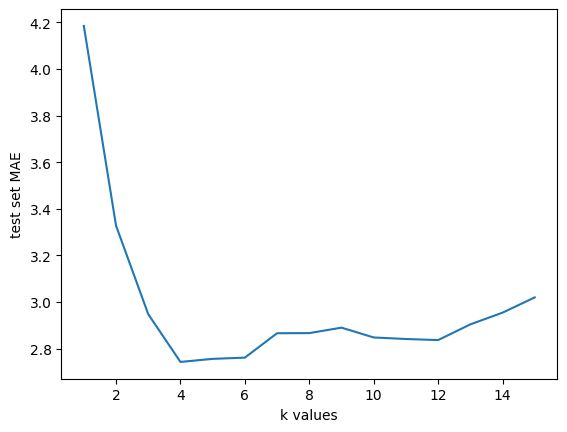

In [13]:
# Learn and graph for different k values

k_vals = []
test_MAEs = []

for i in range(1, 16):
  k_vals.append(i)
  tr_r2, tr_mae, te_r2, te_mae = housing_knn_regressor(X, y, i, "distance", True, False)
  test_MAEs.append(te_mae)

plt.plot(k_vals, test_MAEs)
plt.xlabel("k values")
plt.ylabel("test set MAE")
plt.show()

Discussion

In this task I trained the KNNRegressor with different k values. I created a loop to test the KNNRegressor on k values 1-15, ran the KNNRegressor with each k value, and graphed the MAE with respect to k value. I did this because I wanted to see which k values performed the best. As you can see, a k value of 4 is the best for this dataset. This is because sorting into smaller/larger groups results in overfitting/underfitting. Note that too-small k values performs much worse than too-large k values. I was surprised to observe that the best k value didn't match the best k value from the KNNClassifier. I am not sure why they are different, but my hypothesis is that it has something to do with the inherent differences between the two algorithms.

## 4. (20%) KNN with nominal and real data

- Use the [lymph dataset](https://axon.cs.byu.edu/data/uci_class/lymph.arff)
- Use a 80/20 split of the data for the training/test set
- This dataset has both continuous and nominal attributes
- Implement a distance metric which uses Euclidean distance for continuous features and 0/1 distance for nominal. Hints:
    - Write your own distance function (e.g. mydist) and use clf = KNeighborsClassifier(metric=mydist)
    - Change the nominal features in the data set to integer values since KNeighborsClassifier expects numeric features. I used Label_Encoder on the nominal features.
    - Keep a list of which features are nominal which mydist can use to decide which distance measure to use
    - There was an occasional bug in SK version 1.3.0 ("Flags object has no attribute 'c_contiguous'") that went away when I upgraded to the lastest SK version 1.3.1
- Use your own choice for k and other parameters

In [26]:
# Train/Predict lymph with your own distance metric

nominal_features = [
    'lymphatics',
    'block_of_affere',
    'bl_of_lymph_c',
    'bl_of_lymph_s',
    'by_pass',
    'extravasates',
    'regeneration_of',
    'early_uptake_in',
    'changes_in_lym',
    'defect_in_node',
    'changes_in_node',
    'changes_in_stru',
    'special_forms',
    'dislocation_of',
    'exclusion_of_no',
    'class'
]

def get_lymph_xy ():
  ds = arff.loadarff('lymph.arff')
  df = pd.DataFrame(ds[0])

  le = LabelEncoder()
  for feature in nominal_features:
    df[feature] = le.fit_transform(df[feature])

  X = df.drop('class', axis=1)
  y = df['class']

  return X, y

def mydist (x, y):
  col_list = [1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,0]
  total_dist = 0
  for i,col in enumerate(col_list):
    if col==1 and x[i] != y[i]:
      total_dist += 1
    elif col==0:
      total_dist += (x[i] - y[i])**2
  return np.sqrt(total_dist)

def lymph_knn_classifier(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

  clf = KNeighborsClassifier(metric=mydist)
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  accuracy_train = accuracy_score(y_train, y_pred_train)
  y_pred_test = clf.predict(X_test)
  accuracy_test = accuracy_score(y_test, y_pred_test)

  return accuracy_train, accuracy_test

In [37]:
X, y = get_lymph_xy()

print(lymph_knn_classifier(X, y))

(0.8813559322033898, 0.8333333333333334)


*Explain your distance metric and discuss your results*

In this task I trained the KNNClassifier with a custom distance function. I set up the lymph dataset, made my own distance function as per the above instructions, and ran the KNNClassifier on the lymph dataset using the custom distance function. I did this because I wanted to see how the KNNClassifier performed with the custom distance function. The distance function uses 0/1 for identical/different nominal values and the euclidean distance for continuous values. This is because it is hard to quanitfy the distance between nominal values. Note that the train and test accuracies are both consistently above 75%. I was surprised to observe this accuracy given the nominal distance problem stated earlier. I am not sure why it performs so well using this 0/1 distance function, but my hypothesis is that the dataset has enough data to negate the dip in accuracy from the 0/1 distance function.